# Importing Libraries

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf 

# Importing Deep Learning Libraries

from  tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [ ]:
import os
import random
import shutil

# Set the source folder path containing the images
src_folder = 'All/Surprise'

# Set the destination folder paths for the three splits
split1_folder = 'Dataset/train/Surprise'
split2_folder = 'Dataset/validation/Surprise'
split3_folder = 'Dataset/test'

# Set the percentage splits for the data
split1_percent = 0.8
split2_percent = 0.1
split3_percent = 0.1

# Get a list of all the image files in the source folder
img_files = [f for f in os.listdir(src_folder) if os.path.isfile(os.path.join(src_folder, f))]

# Shuffle the image files randomly
random.shuffle(img_files)

# Calculate the number of images for each split
total_imgs = len(img_files)
split1_count = int(total_imgs * split1_percent)
split2_count = int(total_imgs * split2_percent)
split3_count = total_imgs - split1_count - split2_count

# Copy the images to each split folder
for i, img_file in enumerate(img_files):
    if i < split1_count:
        shutil.copy2(os.path.join(src_folder, img_file), os.path.join(split1_folder, img_file))
    elif i < split1_count + split2_count:
        shutil.copy2(os.path.join(src_folder, img_file), os.path.join(split2_folder, img_file))
    else:
        shutil.copy2(os.path.join(src_folder, img_file), os.path.join(split3_folder, img_file))

In [ ]:
def rename_images_in_folder(folder_path):
    folder_name = os.path.basename(folder_path)
    images = os.listdir(folder_path)
    for i, image in enumerate(images):
        old_path = os.path.join(folder_path, image)
        new_name = "{}_{}.jpg".format(folder_name, i+1)
        new_path = os.path.join(folder_path, new_name)
        os.rename(old_path, new_path)

In [ ]:
emotions = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise']
for i in emotions:
    rename_images_in_folder("Author's_Kids_Dataset/Inception/test/" + i)

# Displaying Images

In [9]:
picture_size = 100
folder_path = "Dataset/"

# Making Training and Validation Data

In [10]:
batch_size  = 8

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),

                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),

                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 552 images belonging to 4 classes.
Found 69 images belonging to 4 classes.


# Model Building

In [11]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

# Create the InceptionResNetV2 model
input_shape = (100, 100, 3)
base_model = InceptionResNetV2(include_top=False, weights= None, input_shape=input_shape)

# Flatten the output of the InceptionResNetV2 model
flatten = Flatten()(base_model.output)

# Add a dense layer with 7 units and a softmax activation function
dense = Dense(4, activation='softmax')(flatten)

# Create the final model
model = Model(inputs=base_model.input, outputs=dense)

# Compile the model with the specified parameters
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the Model with Training and Validation Data 

In [14]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              #optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [17]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                #callbacks=callbacks_list
                                )

/tmp/ipykernel_59/2350914230.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/20
69/69 [==============================] - 16s 224ms/step - loss: 0.1936 - accuracy: 0.9457 - val_loss: 1.4549 - val_accuracy: 0.7188
Epoch 2/20
69/69 [==============================] - 16s 228ms/step - loss: 0.2637 - accuracy: 0.9275 - val_loss: 1.2321 - val_accuracy: 0.7188
Epoch 3/20
69/69 [==============================] - 16s 224ms/step - loss: 0.1889 - accuracy: 0.9420 - val_loss: 1.9716 - val_accuracy: 0.7344
Epoch 4/20
69/69 [==============================] - 16s 224ms/step - loss: 0.2715 - accuracy: 0.9475 - val_loss: 1.4915 - val_accuracy: 0.7812
Epoch 5/20
69/69 [==============================] - 17s 240ms/step - loss: 0.2057 - accuracy: 0.9420 - val_loss: 1.3519 - val_accuracy: 0.6719
Epoch 6/20
69/69 [==============================] - 15s 216ms/step - loss: 0.1265 - accuracy: 0.9638 - val_loss: 0.9902 - val_accuracy: 0.7812
Epoch 7/20
69/69 [==============================] - 15s 220ms/step - loss: 0.3020 - accuracy: 0.9293 - val_loss: 1.9400 - val_accuracy: 0.6875

# Plotting Accuracy & Loss

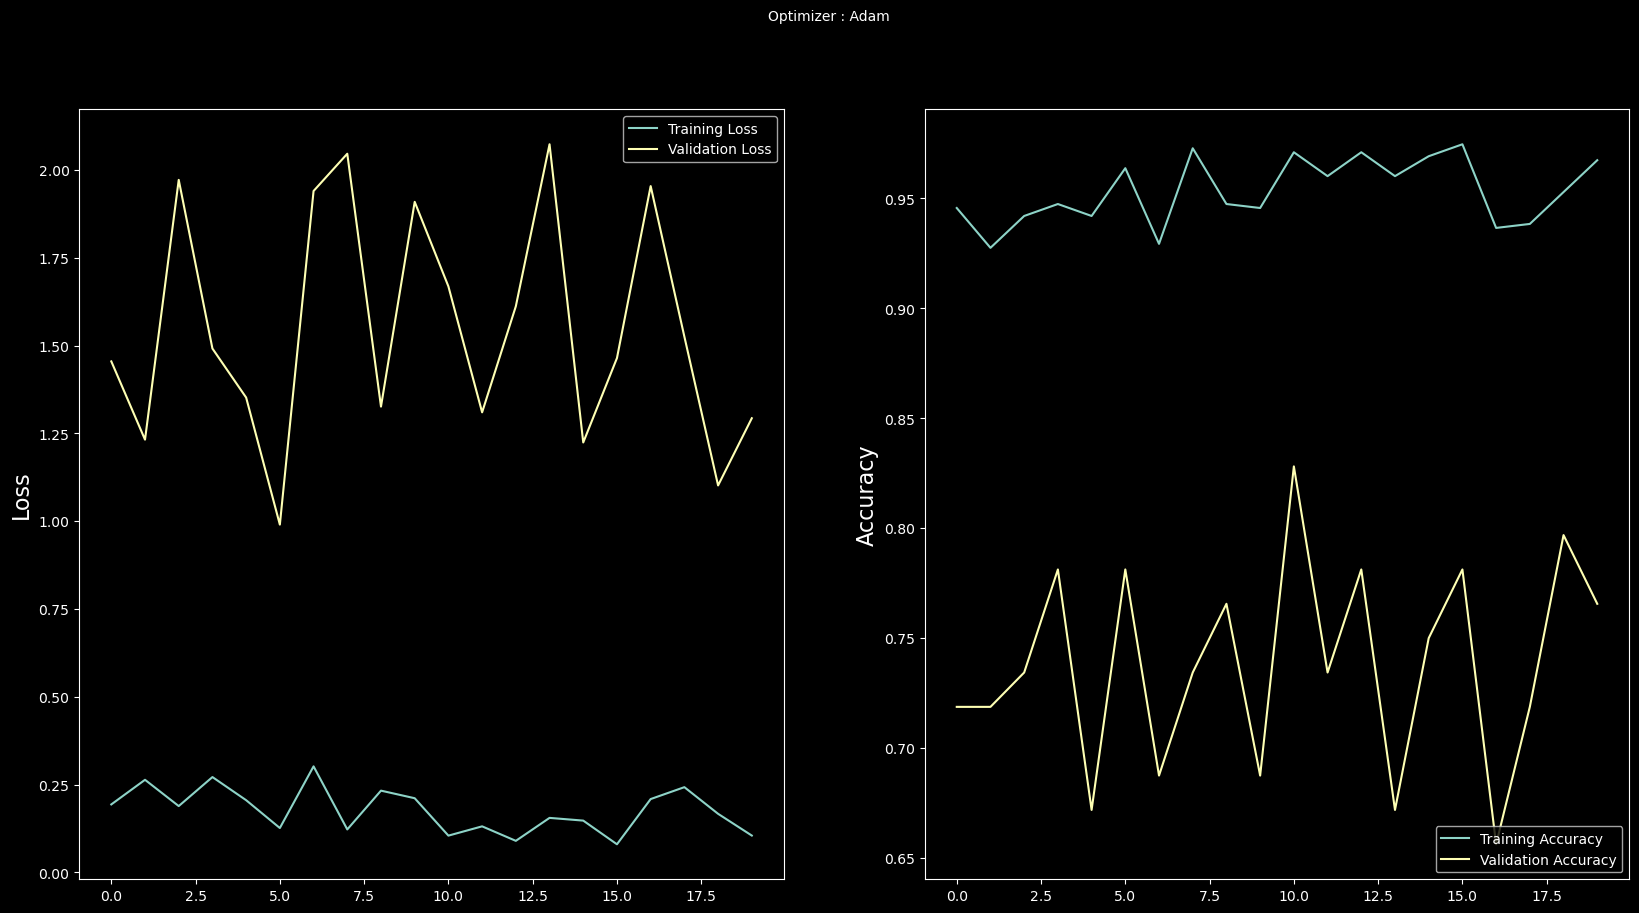

In [18]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [29]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def make_predictions(folder_path, model):
    emotion_labels = [ 'Fear', 'Happy', 'Sad', 'Surprise']
    predictions = []
    num_correct = 0
    total_num = 0
   
    for file_name in os.listdir(folder_path):
        if not file_name.endswith('.jpg'):
            continue
       
        # Split the filename into the emotion label and the index
        label, index = file_name.split('_')
        index = int(index.split('.')[0])
       
        img_path = os.path.join(folder_path, file_name)
        img = load_img(img_path)
        img = tf.image.resize(img, (100, 100))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
       
        prediction = model.predict(img)
        predicted_label = emotion_labels[prediction.argmax()]
        predictions.append((file_name, predicted_label))
       
        if predicted_label == label:
            num_correct += 1
       
        total_num += 1
   
    accuracy = num_correct / total_num
    return predictions, accuracy

In [30]:
folder_path = "Dataset/test"
model = model
predictions, accuracy = make_predictions(folder_path, model)
print("Accuracy: {:.2%}".format(accuracy))
print(predictions)


1/1 [==============================] - 0s 92ms/step
Accuracy: 79.71%
[('Fear_115.jpg', 'Fear'), ('Fear_117.jpg', 'Fear'), ('Fear_140.jpg', 'Fear'), ('Fear_160.jpg', 'Fear'), ('Fear_166.jpg', 'Fear'), ('Fear_170.jpg', 'Fear'), ('Fear_20.jpg', 'Fear'), ('Fear_22.jpg', 'Fear'), ('Fear_36.jpg', 'Surprise'), ('Fear_37.jpg', 'Fear'), ('Fear_52.jpg', 'Fear'), ('Fear_59.jpg', 'Happy'), ('Fear_71.jpg', 'Fear'), ('Fear_77.jpg', 'Fear'), ('Fear_80.jpg', 'Fear'), ('Fear_93.jpg', 'Fear'), ('Fear_99.jpg', 'Happy'), ('Happy_101.jpg', 'Happy'), ('Happy_125.jpg', 'Happy'), ('Happy_131.jpg', 'Happy'), ('Happy_134.jpg', 'Fear'), ('Happy_135.jpg', 'Happy'), ('Happy_144.jpg', 'Happy'), ('Happy_147.jpg', 'Happy'), ('Happy_156.jpg', 'Happy'), ('Happy_161.jpg', 'Happy'), ('Happy_169.jpg', 'Surprise'), ('Happy_17.jpg', 'Sad'), ('Happy_173.jpg', 'Sad'), ('Happy_21.jpg', 'Happy'), ('Happy_30.jpg', 'Happy'), ('Happy_31.jpg', 'Happy'), ('Happy_58.jpg', 'Happy'), ('Happy_66.jpg', 'Happy'), ('Happy_97.jpg', 'Happy')

In [31]:
model.save("LIRIS_I.h5")